In [3]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [1]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2024-09-30 16:40:49--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  83.3MB/s    in 0.3s    

2024-09-30 16:40:49 (83.3 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [4]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [ ]:
# add your code here - consider creating a new cell for each section of code

In [ ]:
# Drop rows have Null of df_books
df_books.dropna(inplace=True)
# Drop rows have Null of df_ratings
df_ratings.dropna(inplace=True)

In [6]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [7]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [10]:

user_rating_count = df_ratings.user.value_counts()
print(user_rating_count)

book_rating_count = df_ratings.isbn.value_counts()
print(book_rating_count)

user
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64
isbn
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64


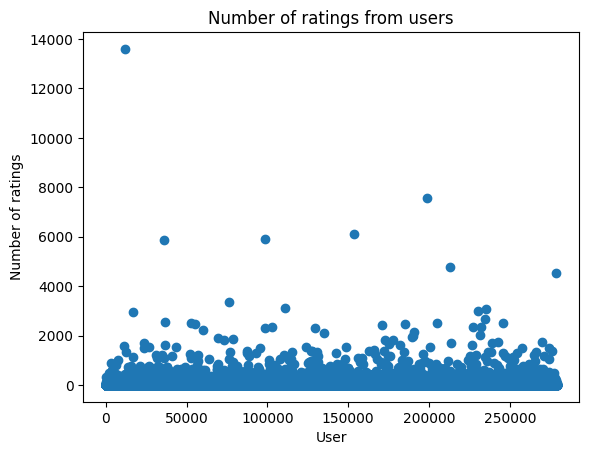

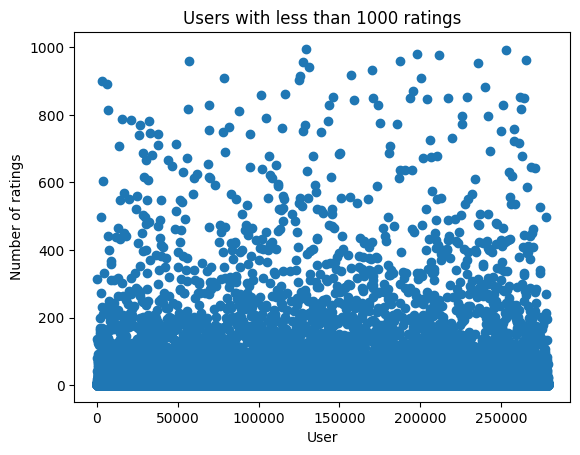

In [11]:
plt.scatter(user_rating_count.index, user_rating_count)
plt.xlabel('User')
plt.ylabel('Number of ratings')
plt.title('Number of ratings from users')

plt.figure()
plt.scatter(user_rating_count[user_rating_count < 1000].index, user_rating_count[user_rating_count < 1000])
plt.xlabel('User')
plt.ylabel('Number of ratings')
plt.title('Users with less than 1000 ratings')

plt.show()

In [13]:
# Remove users with less than 200 ratings and books with less than 100 ratings from df_ratings
saved_users = user_rating_count[user_rating_count < 200]
df_ratings_clean = df_ratings[~df_ratings.user.isin(saved_users.index)]
print(df_ratings_clean.shape)

saved_books = book_rating_count[book_rating_count < 100]
df_ratings_clean = df_ratings_clean[~df_ratings_clean.isbn.isin(saved_books.index)]
print(df_ratings_clean.shape)

(527556, 3)
(49781, 3)


In [15]:
# Merge 2 df
df_ratings_final = df_ratings_clean.merge(df_books, on='isbn', how='inner')
df_ratings_final.head()

,user,isbn,rating,title,author
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,12538,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
4,13552,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner


In [16]:
# Prepare the dataset for kNN
df = df_ratings_final.pivot_table(index=['user'], columns=['title'],values='rating').fillna(0).T
df.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.loc["The Queen of the Damned (Vampire Chronicles (Paperback))"]

In [17]:
model = NearestNeighbors(metric='cosine')
model.fit(df.values)

NearestNeighbors(metric='cosine')

In [36]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):

    # make sure the title is in the database
    in_book = book
    try:
        book = df.loc[book]
    except KeyError as e:
        return f'The book {e} does not exist in the database.'

    # predict 2D array of book.values into the model;
    # since we want to acquire five suggested books, we use six neighbors
    # because the first (the closest book title) is the actual book
    distance, idx = model.kneighbors([book.values], n_neighbors=6)

    # to make it simpler to sort the distance values,
    # put the output into a dataframe and get the values at the end
    recommended_books = pd.DataFrame({
      'title'   : df.iloc[idx[0]].index.values,
      'distance': distance[0]
    }) \
    .sort_values(by='distance', ascending=False) \
    .head(10).values

    return [in_book, recommended_books]
  #return recommended_books

In [38]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", array([["I'll Be Seeing You", 0.8016210794448853],
       ['The Weight of Water', 0.7708583474159241],
       ['The Surgeon', 0.7699410915374756],
       ['I Know This Much Is True', 0.7677075266838074],
       ['The Lovely Bones: A Novel', 0.7234864234924316]], dtype=object)]
You passed the challenge! 🎉🎉🎉🎉🎉
